# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [3]:
# TODO
indice = ds['price'].idxmax()
direccion = ds.iloc[indice,12]
precio = ds.iloc[indice,9]
print('La casa con direccion',direccion,'es la mas cara y su precio es de',precio,'USD')

La casa con direccion El Escorial es la mas cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [4]:
# TODO
indicemin = ds['price'].idxmin()
direccion = ds.iloc[indicemin,12]
precio = ds.iloc[indicemin,6]
print('La casa con direccion',direccion,'es la mas barata y su precio es de',precio,'USD')

La casa con direccion Parla es la mas barata y su precio es de 4.0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [5]:
# TODO
indicesupmax = ds['surface'].idxmax()
direccion = ds.iloc[indicesupmax,12]
superficie = ds.iloc[indicesupmax,8]
print('La casa mas grande esta ubicada en',direccion,'y su superficie es de',superficie,'metros')
indicesupmin = ds['surface'].idxmin()
direccion = ds.iloc[indicesupmin,12]
superficie = ds.iloc[indicesupmin,8]
print('La casa mas pequeña esta ubicada en',direccion,'y su superficie es de',superficie,'metros')

La casa mas grande esta ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros
La casa mas pequeña esta ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# TODO
poblaciones = ds['level5'].unique()
cantpob = len(poblaciones)
print('El Dataset contiene '+str(cantpob)+' poblaciones')
for i in range(cantpob):
    print(poblaciones[i],',')

El Dataset contiene 168 poblaciones
Arganda del Rey ,
Fuenlabrada ,
Boadilla del Monte ,
Las Rozas de Madrid ,
 Madrid Capital ,
Villaviciosa de Odón ,
Pinto ,
Valdemoro ,
Navalcarnero ,
Pozuelo de Alarcón ,
Torrejón de Ardoz ,
Navalagamella ,
San Sebastián de los Reyes ,
Rivas-vaciamadrid ,
Alpedrete ,
Móstoles ,
San Fernando de Henares ,
Coslada ,
Becerril de la Sierra ,
Alcalá de Henares ,
Chinchón ,
Parla ,
Alcorcón ,
El Escorial ,
Leganés ,
Pedrezuela ,
Majadahonda ,
Villanueva de la Cañada ,
Villanueva del Pardillo ,
Torrelodones ,
Moralzarzal ,
Mejorada del Campo ,
Aranjuez ,
Corpa ,
Getafe ,
Velilla de San Antonio ,
Sevilla la Nueva ,
San Martín de la Vega ,
Villalbilla ,
Collado Villalba ,
Alcobendas ,
El Molar (Madrid) ,
Moraleja de Enmedio ,
Algete ,
Campo Real ,
Torrejón de la Calzada ,
Colmenar Viejo ,
Valdemorillo ,
Fuente El Saz de Jarama ,
Tres Cantos ,
Arroyomolinos (Madrid) ,
Griñón ,
Paracuellos de Jarama ,
Guadarrama ,
Titulcia ,
Galapagar ,
Collado Mediano ,
Los Mo

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [7]:
# TODO
contieneNAs = ds.isnull().values.any()
nan_columns = ds.columns[ds.isnull().any()][0]
if contieneNAs:
    print('True en la columna '+nan_columns) 
else: print(contieneNAs) 

True en la columna realEstate_name


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [8]:
# TODO
print('El DataFrame original es de '+ str(ds.shape[0])+' filas y '+str(ds.shape[1])+' columnas')
dslimpio = ds.dropna()
print('El DataFrame despues de las eliminaciones es de '+ str(dslimpio.shape[0])+' filas y '+str(dslimpio.shape[1])+' columnas')

El DataFrame original es de 15335 filas y 37 columnas
El DataFrame despues de las eliminaciones es de 0 filas y 37 columnas


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [9]:
# TODO
preciosarroyomolinos = []
columnalevel5 = ds["level5"]
for i in range(len(columnalevel5)):
    if (columnalevel5[i]=="Arroyomolinos (Madrid)"):
        preciosarroyomolinos.append(ds.iloc[i,9])   
media = np.mean(preciosarroyomolinos)       
print('La media de precios de Arroyomolinos (Madrid) es de '+str(media))

La media de precios de Arroyomolinos (Madrid) es de 294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


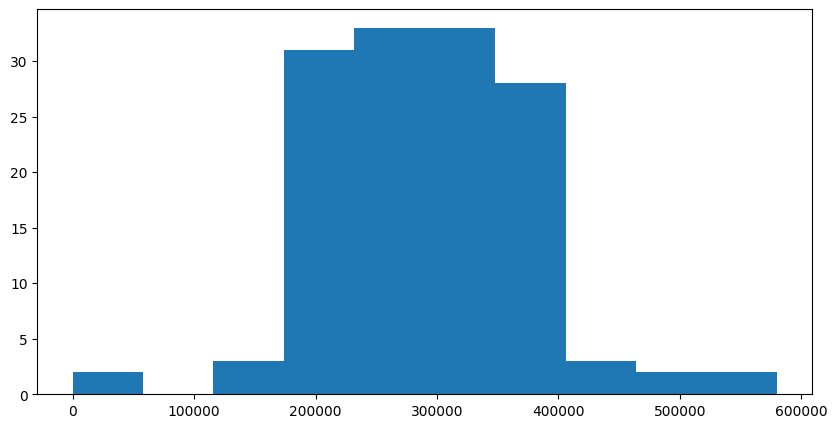

In [10]:
plt.figure(figsize=(10,5))
plt.hist(preciosarroyomolinos);

La mayoria de los precios estan entre 200.000 y 400.000 USD. Se confirma que la media esta por los 300.000 USD. Debe haber errores con los precios de 0 o cercanos a 0 y pueden haber precios mayores a lo normal que casi llegan a los 600.000 USD

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [11]:
# TODO
preciosvaldemorillo = []
preciosgalapagar = []
columnalevel5 = ds["level5"]
for i in range(len(columnalevel5)):
    if (columnalevel5[i]=="Valdemorillo"):
        preciosvaldemorillo.append(ds.iloc[i,9]) 
    elif (columnalevel5[i]=="Galapagar"):
        preciosgalapagar.append(ds.iloc[i,9])  
mediavaldemorillo = np.mean(preciosvaldemorillo)          
mediagalapagar = np.mean(preciosgalapagar)       
if mediavaldemorillo == mediagalapagar:
    print('Los precios promedio de Valdemorillo son los mismos y es de '+str(mediavaldemorillo))
else: print('Los precios promedio son diferentes, el de Valdemorillo es de '+str(mediavaldemorillo)+ ' y el de Galapagar es de ' + str(mediagalapagar))    

Los precios promedio son diferentes, el de Valdemorillo es de 363860.2931034483 y el de Galapagar es de 360063.20238095237


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [12]:
# TODO
ds["pps"] = ds["price"]/ds["surface"]
#ds["pps"]=pps
ppsvaldemorillo = []
ppsgalapagar = []
columnalevel5 = ds["level5"]
for i in range(len(columnalevel5)):
    if (columnalevel5[i]=="Valdemorillo"):# and not(np.any(ds["pps"][i])) :
        ppsvaldemorillo.append(ds.iloc[i,37]) 
    elif (columnalevel5[i]=="Galapagar"):# and not(np.any(ds["pps"][i])):
        ppsgalapagar.append(ds.iloc[i,37]) 

mediavaldemorillo = np.mean(ppsvaldemorillo)   
print(mediavaldemorillo)       
mediagalapagar = np.mean(ppsgalapagar)      
print(mediagalapagar) 
if mediavaldemorillo == mediagalapagar:
    print('Los precios promedio de Valdemorillo son los mismos y es de '+str(mediavaldemorillo))
else: print('Los precios promedio son diferentes, el de Valdemorillo es de '+str(mediavaldemorillo)+ ' y el de Galapagar es de ' + str(mediagalapagar))    


nan
nan
Los precios promedio son diferentes, el de Valdemorillo es de nan y el de Galapagar es de nan


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

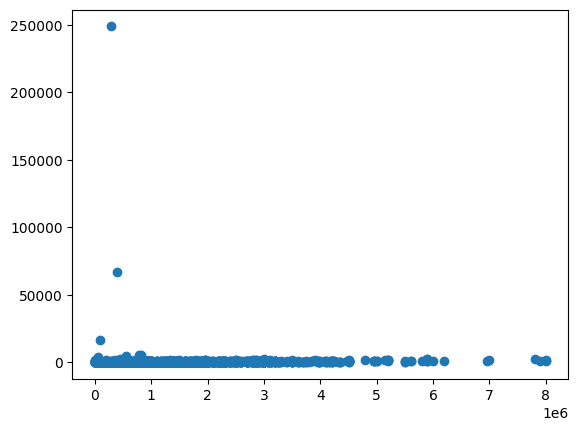

In [13]:
# TODO:
listsurface = ds["surface"].values
listprices = ds["price"].values
plt.scatter(listprices,listsurface);

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [14]:
# TODO
agencias = len(ds["id_realEstates"].unique())
print("El dataset contiene "+str(agencias)+' agencias')

El dataset contiene 14217 agencias


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [16]:
# TODO
poblacionmayor = ds["level5"].unique().max()
cantcasas = ds["level5"].value_counts().max()
print('La mayor cantidad de casas esta en la poblacion de '+str(poblacionmayor[0])+' con '+str(cantcasas)+' casas')

La mayor cantidad de casas esta en la poblacion de Z con 6643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [3]:
# TODO
lista = ["Fuenlabrada","Leganés","Getafe","Alcorcón"]
subds = ds[ds["level5"].isin(lista)]


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

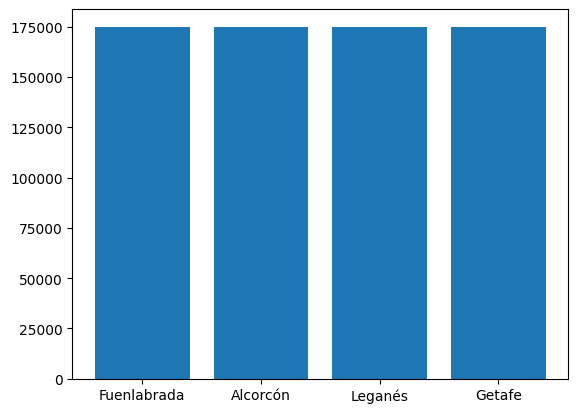

In [17]:
# TODO: Code
#medianas = subds[subds.groupby("level5")["price"].median()]["price"]
medianas=subds['price'].median()
labels = subds["level5"]
plt.bar(labels,medianas);

De acuerdo a la grafica se puede ver que la mediana en estas localidades en especifico es igual

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [18]:
# TODO
print('La media del precio es '+str(subds["price"].mean()))
print('La varianza del precio es '+str(subds["price"].var()))
print('La media de las habitaciones es '+str(subds["rooms"].mean()))
print('La varianza de las habitaciones es '+str(subds["rooms"].var()))
print('La media de la superficie es '+str(subds["surface"].mean()))
print('La varianza de la superficie es '+str(subds["surface"].var()))
print('La media de los baños es '+str(subds["bathrooms"].mean()))
print('La varianza de los baños es '+str(subds["bathrooms"].var()))



La media del precio es 223094.48070562293
La varianza del precio es 14921367508.04902
La media de las habitaciones es 3.0177383592017737
La varianza de las habitaciones es 0.7188858892927542
La media de la superficie es 111.75222363405337
La varianza de la superficie es 4263.051760316337
La media de los baños es 1.633221850613155
La varianza de los baños es 0.5717968625577321


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [19]:
# TODO
print(subds.groupby('level5')['price'].max())

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

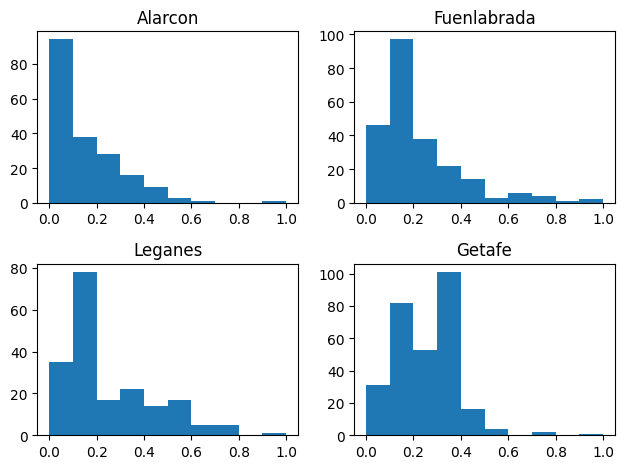

In [20]:
# TODO
scaler = MinMaxScaler()
preciosalcorcon = scaler.fit_transform(subds[subds['level5']=="Alcorcón"]["price"].values.reshape(-1,1))
preciosfuenlabrada = scaler.fit_transform(subds[subds['level5']=="Fuenlabrada"]["price"].values.reshape(-1,1))
preciosleganes = scaler.fit_transform(subds[subds['level5']=="Leganés"]["price"].values.reshape(-1,1))
preciosgetafe = scaler.fit_transform(subds[subds['level5']=="Getafe"]["price"].values.reshape(-1,1))
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(preciosalcorcon,bins=10)
ax0.set_title('Alarcon')
ax1.hist(preciosfuenlabrada,bins=10)
ax1.set_title('Fuenlabrada')
ax2.hist(preciosleganes,bins=10)
ax2.set_title('Leganes')
ax3.hist(preciosgetafe,bins=10)
ax3.set_title('Getafe')

fig.tight_layout()
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

/tmp/ipykernel_1713/1236152489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subds["pps"] = subds["price"]/subds["surface"]


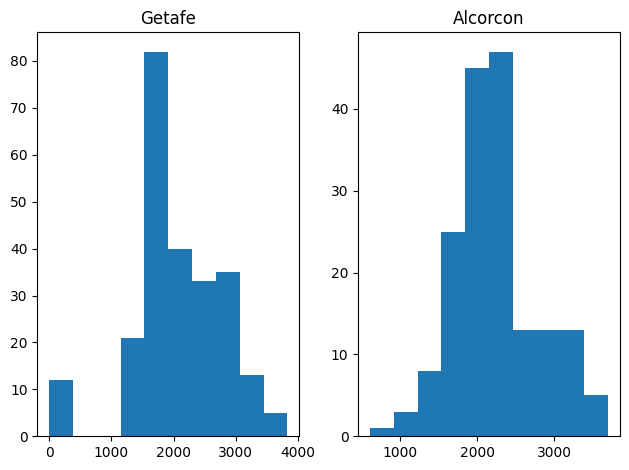

In [21]:
# TODO
subds["pps"] = subds["price"]/subds["surface"]
ppsgetafe = subds[subds["level5"]=='Getafe']['pps']
ppsalcorcon = subds[subds["level5"]=='Alcorcón']['pps']

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)

ax0.hist(ppsgetafe,bins=10)
ax0.set_title('Getafe')
ax1.hist(ppsalcorcon,bins=10)
ax1.set_title('Alcorcon')

fig.tight_layout()
plt.show();

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

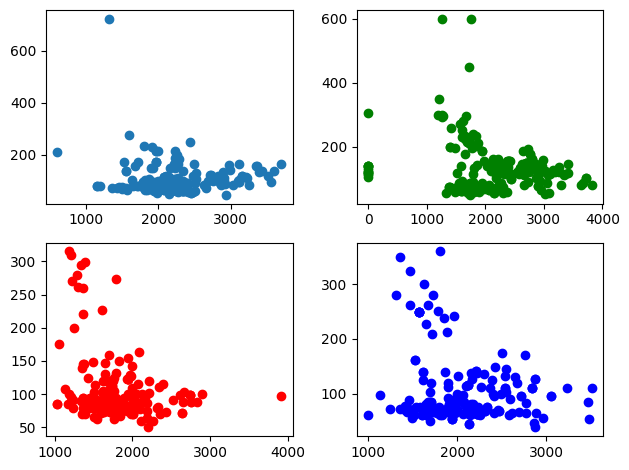

In [22]:
# TODO
fig, ((ax0,ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2)
surfacegetafe = subds[subds["level5"]=='Getafe']['surface']
surfacealcorcon = subds[subds["level5"]=='Alcorcón']['surface']
ppsfuenlabrada = subds[subds["level5"]=='Fuenlabrada']['pps']
surfacefuenlabrada = subds[subds["level5"]=='Fuenlabrada']['surface']
ppsleganes = subds[subds["level5"]=='Leganés']['pps']
surfaceleganes = subds[subds["level5"]=='Leganés']['surface']

ax0.scatter(ppsalcorcon,surfacealcorcon,label='Alcorcon')
ax1.scatter(ppsgetafe,surfacegetafe,label='Getafe',color='green')
ax2.scatter(ppsfuenlabrada,surfacefuenlabrada,label="Fuenlabrada",color='red')
ax3.scatter(ppsleganes,surfaceleganes,label="Leganes",color='blue')

fig.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [4]:
from ipyleaflet import Map, basemaps, Marker

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20)
    #basemap=basemaps.Stamen.Terrain)
map



Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
coordenadas = dict(zip(subds['latitude'], subds['longitude']))
#print(coordenadas)
for (x,y) in coordenadas.items():
    marker = Marker(location=[x.replace(',','.'),y.replace(',','.')], draggable=False)
    map.add(marker);

map

Map(bottom=12512.0, center=[40.78054143186033, -3.0248117871383573], controls=(ZoomControl(options=['position'…